In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.metrics import F1Score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



2025-04-02 10:15:12.328401: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df_features = pd.read_csv(filepath_or_buffer='training_data/landmarks.csv',
                 index_col='pose_id')

df_features.head()

,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,z_left_eye,x_left_eye_outer,...,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
pose_id,,,,,,,,,,,,,,,,,,,,,
0,-5.889507,-57.637520,-45.019750,-4.656085,-62.832863,-44.571823,-3.302626,-63.386856,-44.567863,-2.032406,...,56.852562,-0.842025,35.037060,50.565020,5.842190,45.971020,50.263714,0.092779,45.842150,41.427795
1,-4.255504,-62.935925,-128.907500,-2.977403,-67.035990,-124.258545,-2.215265,-67.198250,-124.263240,-1.494903,...,-14.129170,-1.298891,54.733307,-6.886051,3.980098,65.370830,-49.023930,-5.090634,65.641780,-42.878056
2,-2.878917,-61.709988,-137.453340,-1.619050,-65.693750,-132.181660,-0.785822,-65.814340,-132.184070,-0.019743,...,-19.904400,-2.119770,51.265694,-15.554097,1.994894,62.725025,-57.717957,-4.452602,62.494457,-53.804527
3,-4.242575,-60.371220,-135.094830,-3.118133,-64.416000,-129.995930,-2.369744,-64.603290,-130.003400,-1.753780,...,-6.855729,-1.485475,59.729427,1.433403,1.950102,68.187256,-42.989098,-4.573338,68.144350,-34.117043
4,-0.805543,-56.178570,-41.124413,-0.055174,-58.501305,-37.938560,0.456936,-58.473960,-37.954430,0.969290,...,47.124107,-2.455719,52.861732,45.936783,2.699764,57.254112,27.531416,-2.288348,57.803005,26.288315


In [3]:
df_labels = pd.read_csv(filepath_or_buffer='training_data/labels.csv',
                        index_col='pose_id')
df_labels.head()

,pose
pose_id,
0,jumping_jacks_down
1,jumping_jacks_down
2,jumping_jacks_down
3,jumping_jacks_down
4,jumping_jacks_down


In [4]:
X = df_features.values
y = pd.get_dummies(df_labels, dtype=int).values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38, stratify=y)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
type(X_train)

numpy.ndarray

In [8]:
def get_model(input_size, filters=8, dropout1=0.2, dropout2=0.2, classes=10):
    model = Sequential([
        Input(shape=(input_size,)),
        Dense(filters, activation='relu'),
        Dense(filters, activation='relu'),
        Dense(filters, activation='relu'),
        Dense(filters, activation='relu'),
        BatchNormalization(),
        Dropout(dropout1),
        Dense(filters, activation='relu'),
        Dense(filters, activation='relu'),
        Dense(filters, activation='relu'),
        Dense(filters, activation='relu'),
        BatchNormalization(),
        Dropout(dropout2),
        Dense(classes, activation='softmax'),
    ])
    model.summary()

    return model

In [9]:
def stop_early(patience=10, start=50):
    earlystopping=EarlyStopping(monitor='val_f1_score',
                                patience=patience,
                                verbose=1,
                                mode='max',
                                restore_best_weights=True,
                                start_from_epoch=start)
    return earlystopping

In [10]:
model1 = get_model(99, 64, 0.5, 0.5, 10)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         6,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,682 (143.29 KB)

 Trainable params: 36,426 (142.29 KB)

 Non-trainable params: 256 (1.00 KB)

In [11]:
model1.compile(optimizer='adam', metrics=[F1Score(average='macro', name='f1_score')], loss='categorical_focal_crossentropy')
model1.fit(X_train, y_train, epochs=100, validation_split=0.1, callbacks=[stop_early(20)])

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - f1_score: 0.1473 - loss: 0.6362 - val_f1_score: 0.1679 - val_loss: 0.4432
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.2063 - loss: 0.4650 - val_f1_score: 0.2278 - val_loss: 0.4152
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.3190 - loss: 0.3536 - val_f1_score: 0.2377 - val_loss: 0.3803
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.3733 - loss: 0.3284 - val_f1_score: 0.2470 - val_loss: 0.3528
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.4379 - loss: 0.2801 - val_f1_score: 0.2933 - val_loss: 0.3163
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.4415 - loss: 0.2373 - val_f1_score: 0.3753 - val_loss: 0.2836
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.5448 - loss: 0.2121 - val_f1_score: 0.4510 - val_loss: 0.2492
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.4771 - loss: 0.2194 - val_f1_score: 0.5210 - 

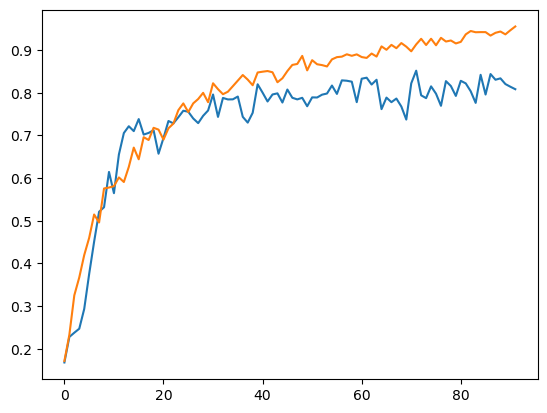

In [12]:
vf1_arr = model1.history.history['val_f1_score']
f1_arr = model1.history.history['f1_score']
plt.plot(range(len(vf1_arr)),vf1_arr)
plt.plot(range(len(f1_arr)),f1_arr)


In [13]:
y_res = model1.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [14]:
def get_highest_threshold(testX, model):
    y_pred = model.predict(testX)
    y_res = np.argmax(y_pred, axis=1)
    max_threshold = 0
    nb_false = {}
    for threshold in np.linspace(0.001,0.999,10000):
        y_threshold = np.argmax((y_pred > threshold).astype(int), axis=1)
        comparison = [a == b for a,b in zip(y_threshold, y_res)]
        nb_false[threshold] = comparison.count(False) / y_res.shape[0]
        # if all(comparison) and max_threshold < threshold:
        #     max_threshold = threshold
    return nb_false

In [15]:
seuil_maximal = get_highest_threshold(X_test, model=model1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


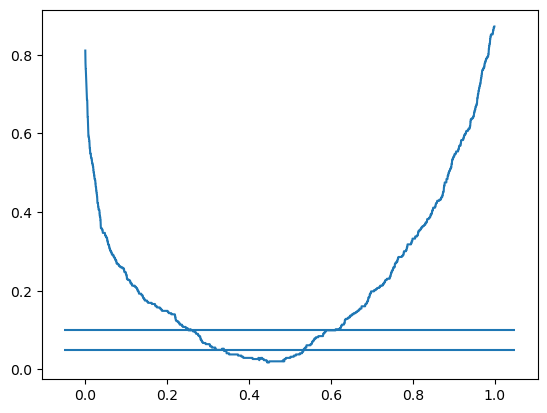

In [16]:
plt.plot(seuil_maximal.keys(), seuil_maximal.values())
plt.hlines(y=0.1, xmin=-0.05, xmax=1.05)
plt.hlines(y=0.05, xmin=-0.05, xmax=1.05)

In [17]:
df_no_poses = pd.read_csv(filepath_or_buffer='training_data/pose_landmarks_per_pose.csv').drop('Frame', axis=1)

In [18]:
df_no_poses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 99 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nose_X            719 non-null    float64
 1   Nose_Y            719 non-null    float64
 2   Nose_Z            719 non-null    float64
 3   LeftEyeInner_X    719 non-null    float64
 4   LeftEyeInner_Y    719 non-null    float64
 5   LeftEyeInner_Z    719 non-null    float64
 6   LeftEye_X         719 non-null    float64
 7   LeftEye_Y         719 non-null    float64
 8   LeftEye_Z         719 non-null    float64
 9   LeftEyeOuter_X    719 non-null    float64
 10  LeftEyeOuter_Y    719 non-null    float64
 11  LeftEyeOuter_Z    719 non-null    float64
 12  RightEyeInner_X   719 non-null    float64
 13  RightEyeInner_Y   719 non-null    float64
 14  RightEyeInner_Z   719 non-null    float64
 15  RightEye_X        719 non-null    float64
 16  RightEye_Y        719 non-null    float64
 1

In [19]:
df_no_poses['pose'] = 'no_pose'
no_pose_labels = df_no_poses.pose
df_no_poses=df_no_poses.drop('pose', axis=1)

In [20]:
df_no_poses.columns = df_features.columns
df_features = pd.concat([df_features, df_no_poses], axis=0).reset_index(drop=True)

In [21]:
df_labels = pd.concat([df_labels, no_pose_labels], axis=0).reset_index(drop=True)

In [22]:
df_labels

,pose
0,jumping_jacks_down
1,jumping_jacks_down
2,jumping_jacks_down
3,jumping_jacks_down
4,jumping_jacks_down
...,...
2086,no_pose
2087,no_pose
2088,no_pose
2089,no_pose


In [23]:
X = df_features.values
y = pd.get_dummies(df_labels, dtype=int).values

(2091, 11)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
model2 = get_model(99, 64, 0.2, 0.2, 11)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         6,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,747 (143.54 KB)

 Trainable params: 36,491 (142.54 KB)

 Non-trainable params: 256 (1.00 KB)

In [26]:
model2.compile(optimizer='adam', metrics=[F1Score(average='macro', name='f1_score')], loss='categorical_focal_crossentropy')
model2.fit(X_train, y_train, epochs=100, validation_split=0.1, callbacks=[stop_early(20)])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - f1_score: 0.2195 - loss: 0.4497 - val_f1_score: 0.2915 - val_loss: 0.4265
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.5124 - loss: 0.1818 - val_f1_score: 0.4559 - val_loss: 0.3502
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.5594 - loss: 0.1365 - val_f1_score: 0.5831 - val_loss: 0.2500
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.6709 - loss: 0.1065 - val_f1_score: 0.6241 - val_loss: 0.1812
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.6674 - loss: 0.0991 - val_f1_score: 0.6213 - val_loss: 0.1236
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.6593 - loss: 0.0953 - val_f1_score: 0.6333 - val_loss: 0.1001
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.6820 - loss: 0.0879 - val_f1_score: 0.6551 - val_loss: 0.0805
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.7129 - loss: 0.0798 - val_f1_score: 0.6989 - 

In [27]:
print(classification_report(y_true=np.argmax(y_test, axis=1),
                            y_pred=np.argmax(model2.predict(X_test), axis=1)))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        47
           1       0.81      0.84      0.83        45
           2       1.00      1.00      1.00       180
           3       0.89      0.82      0.85        39
           4       0.81      0.74      0.77        34
           5       0.95      0.84      0.89        25
           6       0.86      0.89      0.88        36
           7       0.85      0.92      0.88        25
           8       0.84      0.84      0.84        25
           9       0.85      0.88      0.86        32
          10       0.62      0.60      0.61        35

    accuracy                           0.88       523
   macro avg       0.84      0.84      0.84       523
weighted avg       0.88      0.88      0.88       523

